# Using NasdaqOmx Index data-set

The python version of this sample can be found [here](https://github.com/shyams80/plutons/blob/master/docs-py/NasdaqOmx.ipynb)

In [1]:
library(tidyverse)
library(ggthemes)
library(odbc)
library(plutoR)
library(quantmod)
library(PerformanceAnalytics)

source("goofy/misc.common.R")
source("goofy/plot.common.R")
source("config.R")

options("scipen"=999)
options(repr.plot.width=16, repr.plot.height=8)

#initialize
nasdaqOmx <- NasdaqOmx()

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.1
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Attaching package: ‘xts’

The following objects are masked from ‘package:dplyr’:

    first, last

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.

Attaching package: ‘PerformanceAnalytics’

The following object is masked from ‘package:graphics’:

    legend


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine


Attaching package: ‘lubridate’

The follow

In [2]:
# fetch all "India" TR NASDAQOMX indices

nasdaqOmx$Meta() %>%
    inner_join(nasdaqOmx$TimeSeries()) %>%
    group_by(ID, NAME) %>%
    filter(NAME %like% '% india %') %>%
    summarize(ST = min(TIME_STAMP), ET = max(TIME_STAMP)) %>%
    print(n = Inf)
    

Joining, by = "ID"
Warning message:
“Missing values are always removed in SQL.
Use `MIN(x, na.rm = TRUE)` to silence this warning
This warning is displayed only once per session.”Warning message:
“Missing values are always removed in SQL.
Use `MAX(x, na.rm = TRUE)` to silence this warning
This warning is displayed only once per session.”

# Source:   lazy query [?? x 4]
# Database: Microsoft SQL Server 13.00.4224[ro1@NORWAY/StockVizUs2]
# Groups:   ID
         ID NAME                                          ST         ET        
      <int> <chr>                                         <date>     <date>    
 1 13120874 NASDAQ India Basic Matls TR Index (NQIN1000T) 2001-03-30 2019-07-05
 2 13120916 NASDAQ India Cnsmr Goods TR Index (NQIN3000T) 2001-03-30 2019-07-05
 3 13120939 NASDAQ India Cnsmr Svcs TR Index (NQIN5000T)  2005-03-31 2019-07-05
 4 13120986 NASDAQ India Financials TR Index (NQIN8000T)  2001-03-30 2019-07-05
 5 13121029 NASDAQ India Health Care TR Index (NQIN4000T) 2001-03-30 2019-07-05
 6 13121072 NASDAQ India Inds TR Index (NQIN2000T)        2001-03-30 2019-07-05
 7 13121187 NASDAQ India Oil & Gas TR Index (NQIN0001T)   2004-09-30 2019-07-05
 8 13121253 NASDAQ India Tech TR Index (NQIN9000T)        2001-03-30 2019-07-05
 9 13121272 NASDAQ India TR Index (NQINT)                 2001-03-30 2019-07-05
10 13

### plot total returns



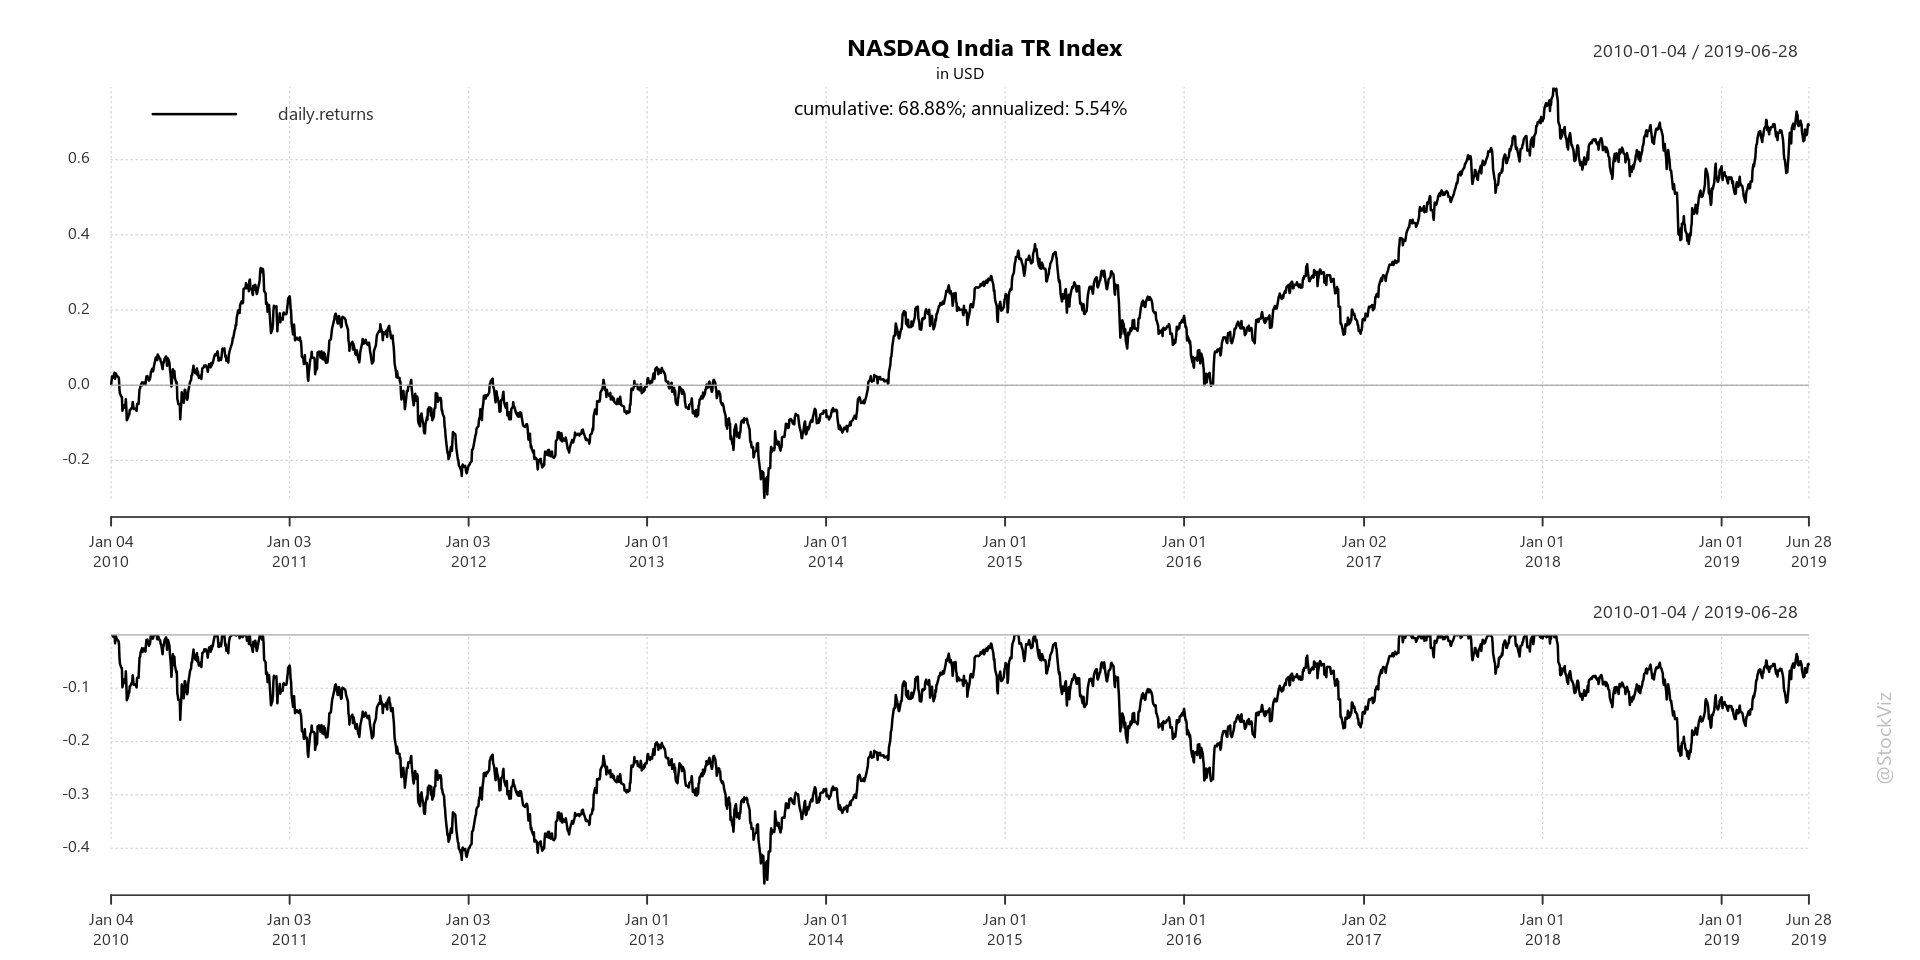

In [3]:
nqId <- 13121272 #NASDAQ India TR Index (NQINT)
startDate <- as.Date('2010-01-01')
endDate <- as.Date('2019-06-30')

nqVals <- nasdaqOmx$TimeSeries() %>%
    filter(ID == nqId & TIME_STAMP >= startDate & TIME_STAMP <= endDate) %>%
    select(TIME_STAMP, CLOSE) %>%
    collect()

nqRets <- dailyReturn(xts(nqVals$CLOSE, nqVals$TIME_STAMP))

Common.PlotCumReturns(nqRets, "NASDAQ India TR Index", "in USD")

This notebook was created using [pluto](http://pluto.studio). Learn more [here](https://github.com/shyams80/pluto)